## CS495 - Linear Regression

## Motivation

Why should we use linear regression to model our problem?

- Simple technique that sometimes works well for prediction
- Closed form optimal solution (fast)
- Standard method, easy to communicate

## Proof

Assume $y \in \mathbb{R}^{[n \times 1]}$ is generated by the linear combination of variables $X \in \mathbb{R}^{[n \times k]}$ for $n$ observations and $k$ features.

Find a vector of coefficients $\beta \in \mathbb{R}^{[k \times 1]}$ s.t. $\hat{y} = X \beta + \epsilon$, where $\epsilon$ is some constant Gaussian noise, and $\hat{y}$ is our prediction.

$\beta$ should minimize error between our prediction $\hat{y}$ and the observed $y$. How might we measure this error?

### Loss Function

$\min_{\beta} \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y})^2$ = $\min_{\beta} \frac{1}{N} \sum_{i=1}^{N} (y_i - X_i \beta)^2$

#### Matrix form

In matrix form, we have

$\min_{\beta} \frac{1}{N} \left( (X \beta - y)^T (X \beta - y) \right)$

Let $\psi$ represent our loss function, namely

$\psi(\beta) = \frac{1}{N} \left( \beta^T X^T X \beta - \beta^T X^T y - y^TX\beta + y^T y \right)$

Notice that the middle terms are equivalent, since

$\beta^T X^T y = (y^T X \beta)^T$ and they are scalars, 

$[1 \times k] \times [k \times n] \times [n \times 1] = [1 \times 1]$.

Our final loss function is then

$= \frac{1}{N} \left( \beta^T X^T X \beta - 2 \beta^T X^T y + y^T y \right)$

Fortunately, we chose a function that is convex and differentiable (MSE is often used for this reason). How do we find the minimum of this function?

### Optimal Solution

The minimum is at the point where the derivative of $\psi$ wrt $\beta$ equals 0,

$\frac{d \Psi}{d\beta} = \frac{1}{N} \left[ 2X^T X \beta - 2X^T y \right] = 0$

Simplifying,

$X^T X \beta = X^T y$

and then finally solving for $\beta$:

$\beta = (X^T X)^{-1} X^T y$

## Demo

### Generate data

In [1]:
import seaborn as sns
import numpy as np

In [2]:
x = np.arange(0, 100).reshape(-1,1)
bias = 10
beta1 = 2
y = bias + beta1*x + np.random.normal(0, 10, (100,1))

<AxesSubplot: >

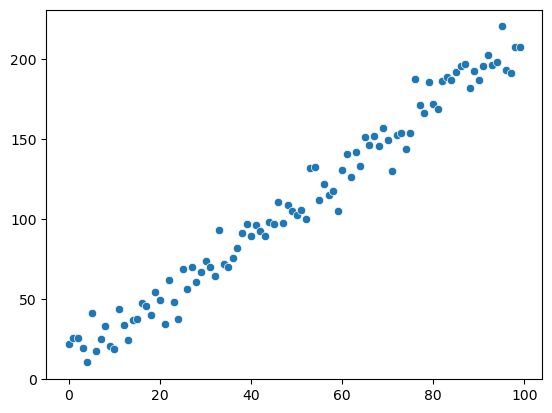

In [3]:
sns.scatterplot(x=x.flatten(), y=y.flatten())

### Build model

In [4]:
class OLS:
    def __init__(self):
        self.B = None
    
    def fit(self, X, y):
        self.B = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
    
    def predict(self, X):
        return X @ self.B

<AxesSubplot: >

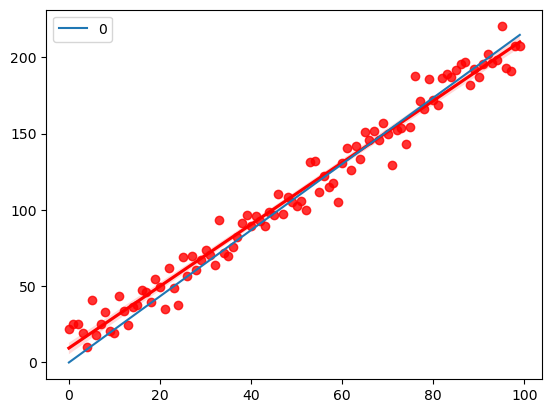

In [5]:
ols = OLS().fit(x, y)
sns.regplot(x=x, y=y, color='r')
sns.lineplot(ols.predict(x))

Can anyone spot the error?

### Solution

To add bias, we simply concatenate a vector of 1's to our feature matrix.

<AxesSubplot: >

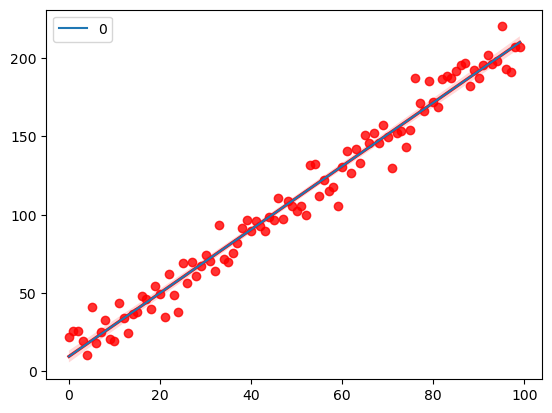

In [6]:
sns.regplot(x=x, y=y, color='r')

# add vector of ones, now our model is affine
x = np.concatenate((x, np.ones(x.shape)), axis=1)

ols = OLS().fit(x, y)
sns.lineplot(ols.predict(x))

In [7]:
ols.B

array([[2.02655979],
       [9.43881953]])

## Follow-Up

- How would you extend $\psi$ to include an L2 loss (ridge regression)? What is $\beta$ after we make this change?
- Can you find a closed form solution with an L1 loss (lasso)? Why or why not?
- OLS assumes a constant variance in the error term. If we have heteroskedastic data, we can weight each data point by $w_i = \frac{1}{\sigma_i^2}$, the inverse of the variance of the data point, to model this effect. Find the closed form solution when we weigh the data by matrix $W \in \mathbb{R}^{[n \times n]}$.

## References



Shalizi, Cosma Rohilla. Advanced Data Analysis from an Elementary Point of View. 15 Feb. 2024, www.stat.cmu.edu/~cshalizi/ADAfaEPoV/ADAfaEPoV.pdf.